In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn import decomposition, tree
import pandas as pd

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def converter(currency, amount):
    coversion_dict = {'SEK':0.09703,'MXN':0.04358,'AUD':0.63161,'NZD':0.58377,'GBP':1.13355}
    return round(amount * coversion_dict[currency])

In [3]:
def loadData():
    dataset = pd.read_csv('data_for_student_case.csv')
    #Delete the Refused transactions
    #Convert amount into Euros
    dataset = dataset.loc[dataset['simple_journal']!='Refused']
    dataset['EuroAmount']=dataset.apply(lambda row: converter(row['currencycode'],row['amount']),axis=1)
    #Convert creatiomn date into datetime format and extract each month, day, year,hour
    dataset['creationdate'] = pd.to_datetime(dataset['creationdate'],format='%Y-%m-%d %H:%M:%S')
    dataset['bookingdate'] = pd.to_datetime(dataset['bookingdate'],format='%Y-%m-%d %H:%M:%S')
    dataset['creation_hour'] = dataset.creationdate.dt.hour
    dataset['creation_day'] = dataset.creationdate.dt.day
    dataset['creation_month'] = dataset.creationdate.dt.month
    dataset['creation_year'] = dataset.creationdate.dt.year
    dataset['label'] = np.where(dataset['simple_journal']=='Chargeback', 1, 0)
    dataset.to_csv('dataset2.csv')
    return dataset

In [4]:
def heatmap(dataset, col_x, col_y, label):
    #filtering the dataset
    filtered_dataset = dataset[dataset['label'] == label]
    filtered_dataset = filtered_dataset.assign(simple_journal=1)
    aggregation_data = filtered_dataset.groupby([col_x, col_y]).size().reset_index(name='count')
    #filtering country code
    account_code = list(dataset[col_y][dataset.simple_journal == 'Chargeback'].unique())
    shopper_code = list(dataset[col_x][dataset.simple_journal == 'Chargeback'].unique())
    aggregation_data = aggregation_data[aggregation_data[col_y].isin(account_code)]
    aggregation_data = aggregation_data[aggregation_data[col_x].isin(shopper_code)]
    final_data = aggregation_data.pivot(index=col_y, columns=col_x, values='count')
    sns.set()
    cmap = sns.cm.rocket_r
    sns.heatmap(final_data, linewidth=0.5,cmap = cmap)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.savefig('Heatmap')
    plt.show()

In [5]:
dataset = loadData()

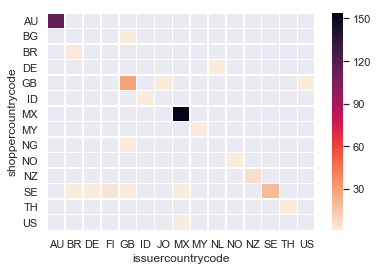

In [6]:
label = 1
column_x = 'issuercountrycode'
column_y = 'shoppercountrycode'
heatmap(dataset, column_x, column_y, label)

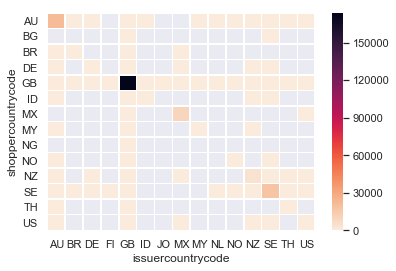

In [7]:
label = 0
column_x = 'issuercountrycode'
column_y = 'shoppercountrycode'
heatmap(dataset, column_x, column_y, label)

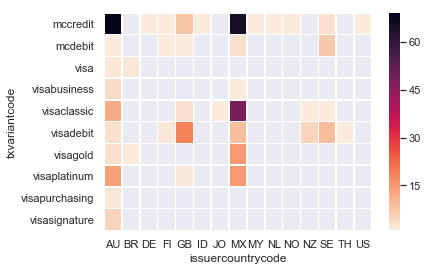

In [8]:
label = 1
column_x = 'issuercountrycode'
column_y = 'txvariantcode'
heatmap(dataset, column_x, column_y, label)

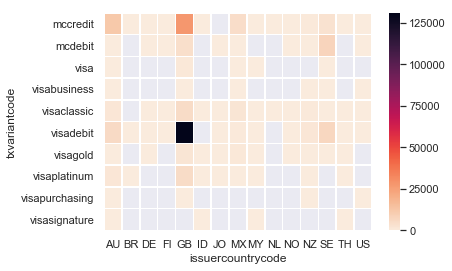

In [9]:
label = 0
column_x = 'issuercountrycode'
column_y = 'txvariantcode'
heatmap(dataset, column_x, column_y, label)